### Voronoi diagram (graph) 

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
expr_data_df =   pd.read_csv('expr_data.csv')
expr_locs_df = pd.read_csv('expr_locs.csv')

expr_data_df = expr_data_df.iloc[:,1:]
expr_locs_df = expr_locs_df.iloc[:,1:]

expr_data = np.asarray(expr_data_df) ### 3000 genes x 3639 locs
expr_locs = np.asarray(expr_locs_df) ### 3639 locs x 2 coords

In [3]:
expr_locs_df = expr_locs_df.rename(columns = {'x_coord':'x', 'y_coord':'y'})

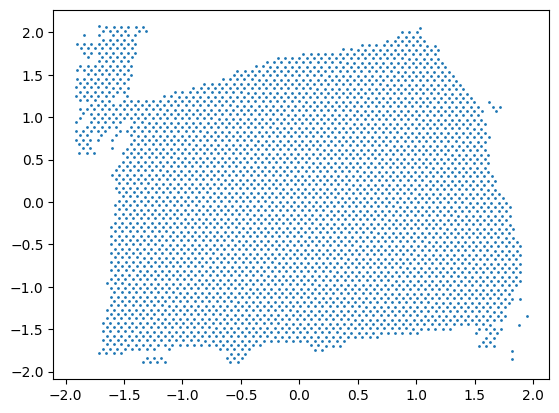

In [5]:
plt.scatter(expr_locs[:,0], expr_locs[:, 1], s = 1)

#### additional functions to deal with Voronoi diagram (adapt to the SpLSI functions)

In [9]:
from scipy.spatial import Delaunay
tri = Delaunay(expr_locs)

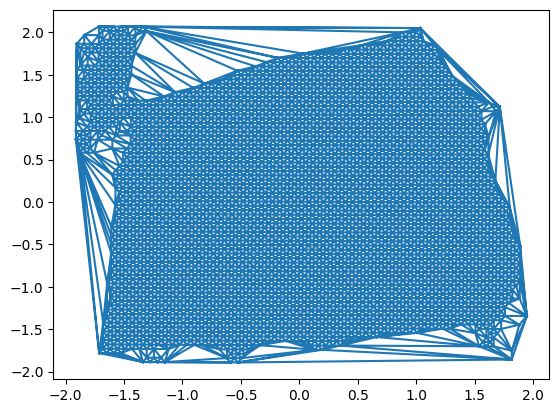

In [7]:
plt.triplot(expr_locs[:,0], expr_locs[:, 1], tri.simplices)
plt.plot(expr_locs[:,0], expr_locs[:, 1], 'o')
plt.show()

##### Create graph object

In [10]:
G = nx.Graph()
for path in tri.simplices:
    nx.add_path(G, path)


#### add coordinates to the Voronoi graph object

In [13]:
for i in range(len(G.nodes())):
    G.nodes[i]['pos'] = expr_locs[i,:]

#### add edge weights

In [14]:
for node1 in G.nodes:
        for node2 in G.nodes:
            if node1 < node2 and G.has_edge(node1, node2):
                pos1 = G.nodes[node1]['pos']
                pos2 = G.nodes[node2]['pos']
                dist = norm(np.array(pos1) - np.array(pos2))
                w = np.exp(-phi*(dist)**2)
                G.edges[node1, node2]['weight'] = w

#### generate weights according to the maximum-spanning tree of the graph

In [35]:
mst, path = get_mst_path(G)

In [16]:
n = 3592 
p = 3000 
K = 5

In [17]:
phi = 1/0.0384389841263021

In [73]:
def generate_weights1(n,G):
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if G.has_edge(i, j):
                K[i, j] = G.edges[(i,j)]['weight']
    return K

In [74]:
weights = generate_weights1(n,G) ### weights for further cross validation steps